<center><h1><b>Group 2</b></h1></center>


Team Members:
1. Foram Raju Trivedi
2. Sakshi Anand Kodre
3. George Chempumthara

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm


sns.set()

# 1. Introduction

The NOAA hurricane storm dataset provides detailed information on various hurricanes, including their central pressure, maximum wind speeds, and Saffir-Simpson categories. This dataset allows for the investigation of how atmospheric pressure affects hurricane intensity. The objective is to examine whether lower central pressure correlates with higher wind speeds and stronger storm categories. By analyzing these relationships, we aim to better understand the dynamics of hurricanes. This study is essential for improving hurricane prediction and response strategies.

## 1.1 Basic Installations

In [30]:
pip install pymc

In [10]:
data = pd.read_csv('storms.csv')
data

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19061,19062,Wanda,2021,11,7,0,37.4,-37.4,tropical storm,NaN,35,1003,60.0,0.0
19062,19063,Wanda,2021,11,7,6,38.1,-36.4,tropical storm,NaN,35,1004,60.0,0.0
19063,19064,Wanda,2021,11,7,12,39.2,-34.9,other low,NaN,35,1006,90.0,0.0
19064,19065,Wanda,2021,11,7,18,40.9,-32.8,other low,NaN,40,1006,90.0,0.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19066 non-null  int64  
 1   name                          19066 non-null  object 
 2   year                          19066 non-null  int64  
 3   month                         19066 non-null  int64  
 4   day                           19066 non-null  int64  
 5   hour                          19066 non-null  int64  
 6   lat                           19066 non-null  float64
 7   long                          19066 non-null  float64
 8   status                        19066 non-null  object 
 9   category                      4684 non-null   float64
 10  wind                          19066 non-null  int64  
 11  pressure                      19066 non-null  int64  
 12  tropicalstorm_force_diameter  9554 non-null   float64
 13  h

In [14]:
data.isnull().sum(axis=0)

Unnamed: 0                          0
name                                0
year                                0
month                               0
day                                 0
hour                                0
lat                                 0
long                                0
status                              0
category                        14382
wind                                0
pressure                            0
tropicalstorm_force_diameter     9512
hurricane_force_diameter         9512
dtype: int64

## 1.2 Data Preprocessing

In [17]:
df = data.dropna()

In [19]:
df.isnull().sum(axis=0)

Unnamed: 0                      0
name                            0
year                            0
month                           0
day                             0
hour                            0
lat                             0
long                            0
status                          0
category                        0
wind                            0
pressure                        0
tropicalstorm_force_diameter    0
hurricane_force_diameter        0
dtype: int64

In [21]:
df.head()

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
9442,9443,Alex,2004,8,3,6,33.0,-77.4,hurricane,1.0,70,983,130.0,40.0
9443,9444,Alex,2004,8,3,12,34.2,-76.4,hurricane,2.0,85,974,130.0,40.0
9444,9445,Alex,2004,8,3,18,35.3,-75.2,hurricane,2.0,85,972,165.0,50.0
9445,9446,Alex,2004,8,4,0,36.0,-73.7,hurricane,1.0,80,974,155.0,55.0
9446,9447,Alex,2004,8,4,6,36.8,-72.1,hurricane,1.0,80,973,195.0,65.0


In [23]:
df.tail()

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
18976,18977,Sam,2021,10,4,0,38.7,-52.2,hurricane,2.0,90,957,420.0,100.0
18977,18978,Sam,2021,10,4,6,39.9,-49.9,hurricane,2.0,90,957,440.0,60.0
18978,18979,Sam,2021,10,4,12,41.4,-47.1,hurricane,2.0,85,960,440.0,60.0
18979,18980,Sam,2021,10,4,18,43.8,-43.6,hurricane,1.0,80,965,500.0,70.0
18980,18981,Sam,2021,10,5,0,46.5,-40.5,hurricane,1.0,75,965,570.0,70.0


In [25]:
df.describe()

,Unnamed: 0,year,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,14147.120429,2012.424183,8.952706,15.229157,9.099464,25.532813,-64.672111,2.010726,88.771331,965.334959,254.000488,63.291078
std,2864.059116,5.640488,1.021814,8.826078,6.723157,7.743515,17.106590,1.209266,21.807962,19.228851,117.349387,38.591262
min,9443.000000,2004.000000,1.000000,1.000000,0.000000,9.500000,-98.400000,1.000000,65.000000,882.000000,50.000000,0.000000
25%,11641.500000,2007.000000,8.000000,8.000000,5.000000,19.150000,-77.500000,1.000000,70.000000,953.000000,175.000000,35.000000
50%,14123.000000,2012.000000,9.000000,15.000000,10.000000,25.400000,-64.800000,2.000000,85.000000,968.000000,240.000000,50.000000
75%,16410.500000,2017.000000,9.000000,23.000000,16.000000,31.100000,-53.250000,3.000000,105.000000,981.000000,310.000000,85.000000
max,18981.000000,2021.000000,12.000000,31.000000,23.000000,48.800000,-14.100000,5.000000,160.000000,1001.000000,870.000000,300.000000


## 1.3 Explanatory Data Analysis

In [28]:
columns = df[['wind', 'pressure', 'tropicalstorm_force_diameter', 'hurricane_force_diameter']]

<Figure size 1200x800 with 0 Axes>

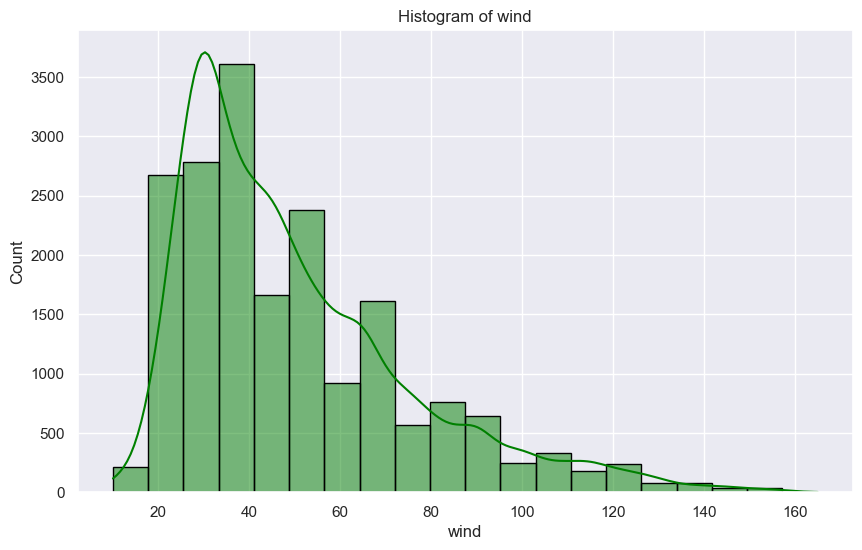

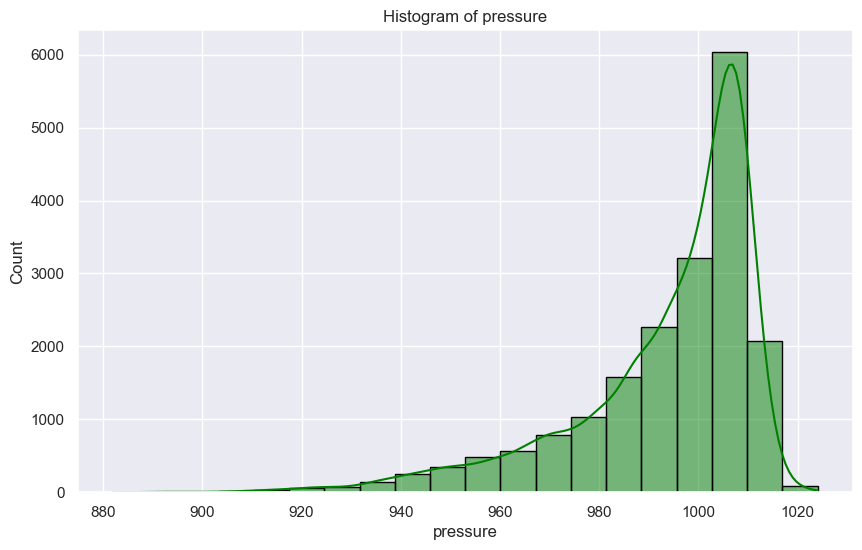

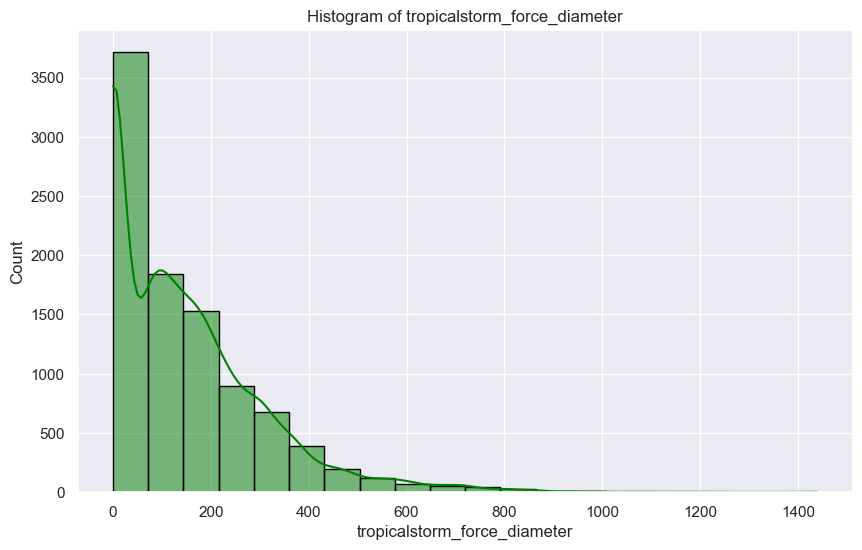

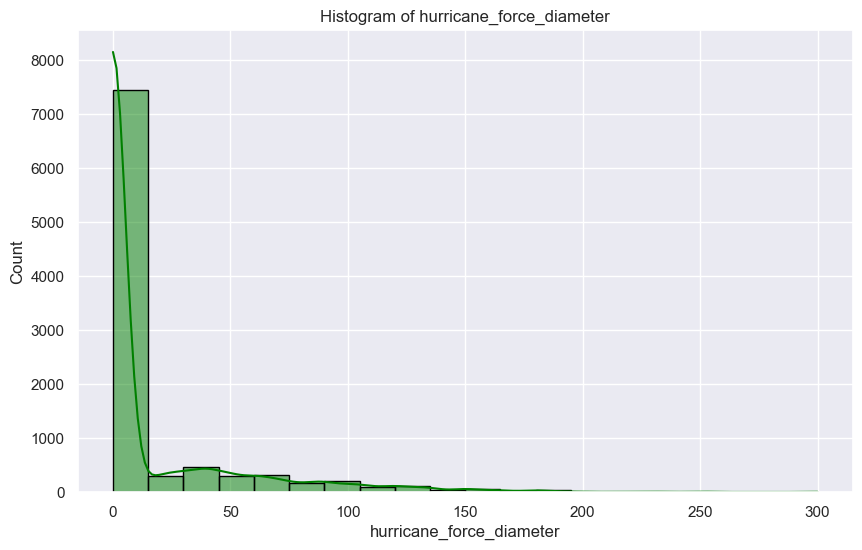

In [30]:
plt.figure(figsize=(12, 8))
for column in columns:
  plt.figure(figsize=(10,6))
  sns.histplot(data[column], kde=True, bins=20, color='green',edgecolor='black')
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.show()

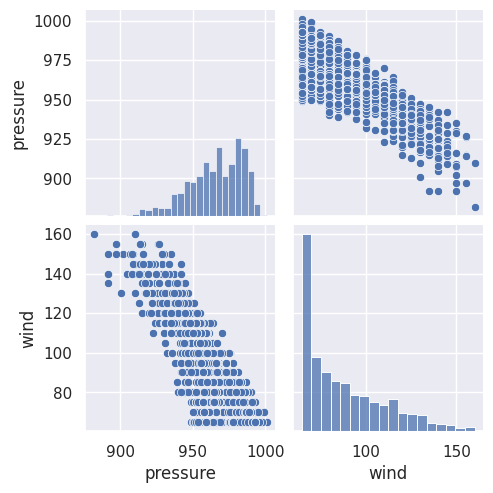

In [12]:
sns.pairplot(df[['pressure','wind']])
plt.show()

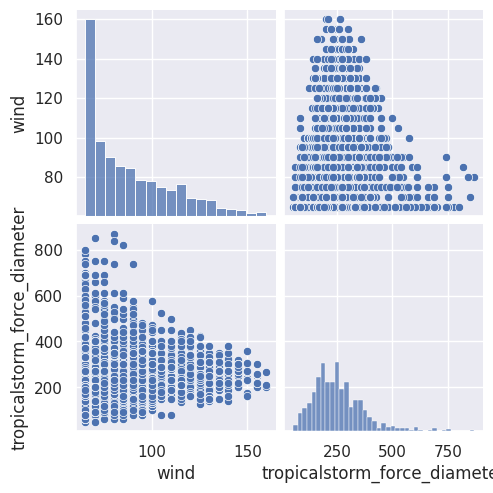

In [13]:
sns.pairplot(df[['wind','tropicalstorm_force_diameter']])
plt.show()

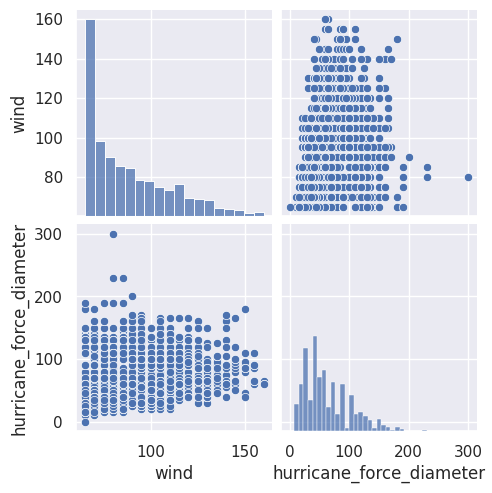

In [14]:
sns.pairplot(df[['wind','hurricane_force_diameter']])
plt.show()

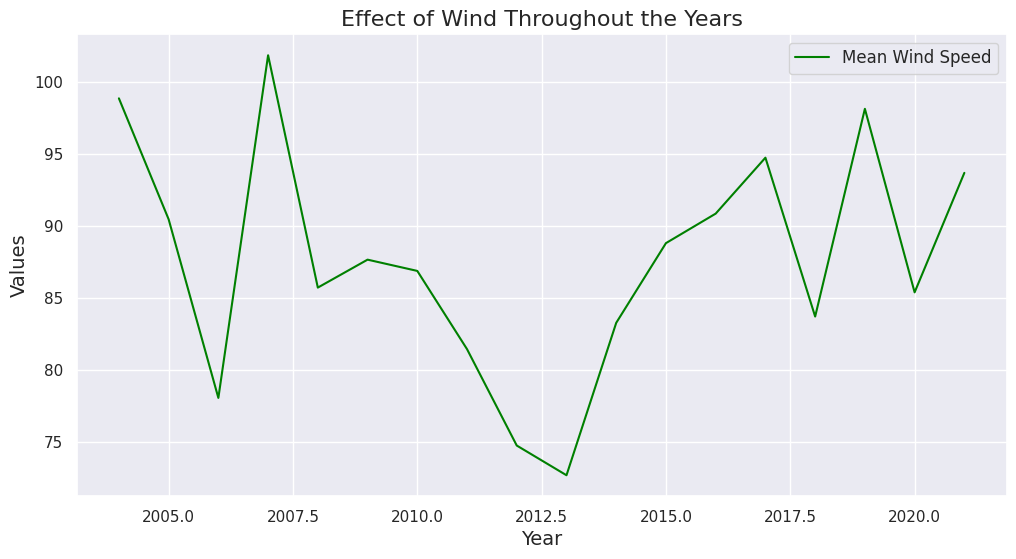

In [15]:

yearly_data = df.groupby("year")[["wind"]].mean().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x="year", y="wind", label="Mean Wind Speed", color="green")

# Plotting on the grid
plt.title("Effect of Wind Throughout the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

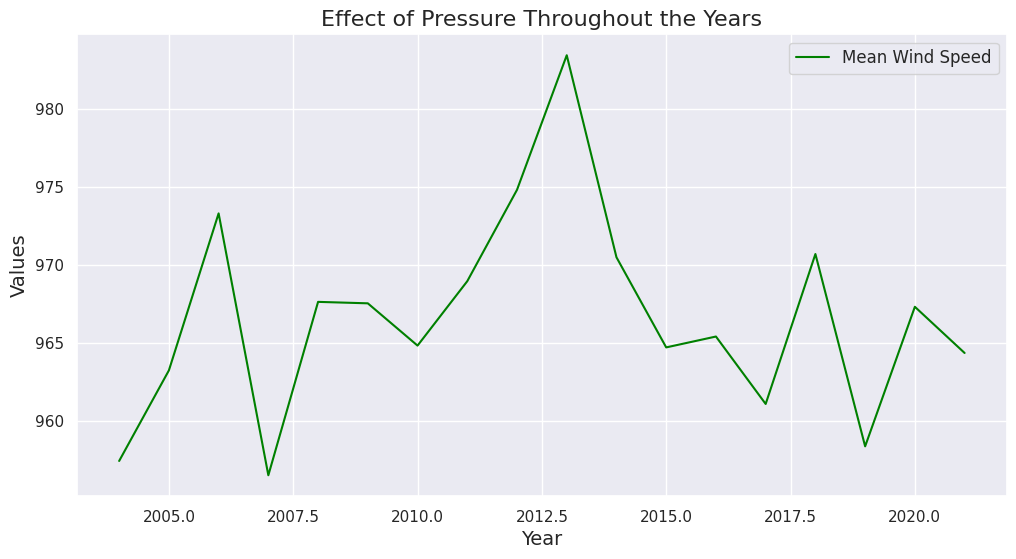

In [16]:

yearly_data = df.groupby("year")[["pressure"]].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x="year", y="pressure", label="Mean Wind Speed", color="green")

# Plotting on the grid
plt.title("Effect of Pressure Throughout the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

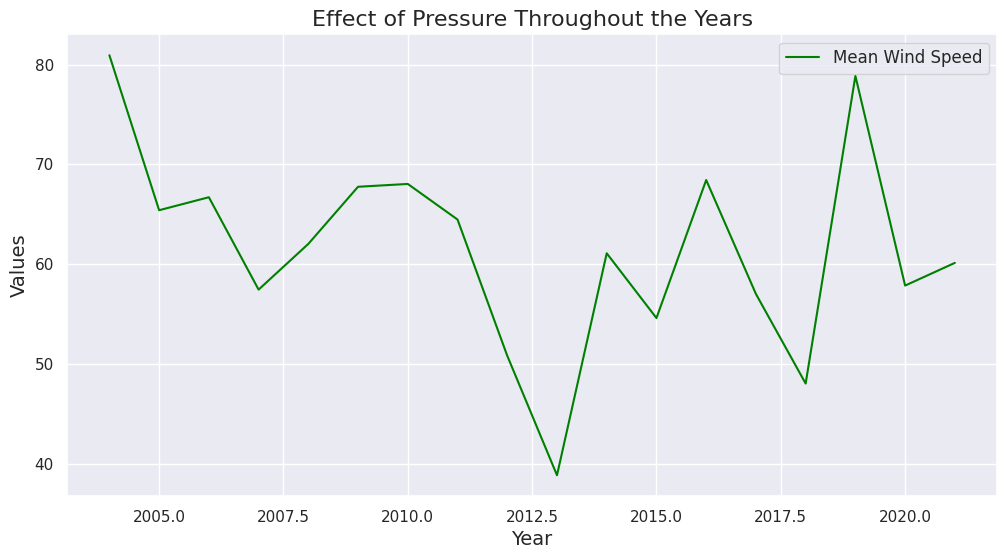

In [17]:
# Grouping data by year and calculate mean pressure and wind speed

yearly_data = df.groupby("year")[["hurricane_force_diameter"]].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x="year", y="hurricane_force_diameter", label="Mean Wind Speed", color="green")

plt.title("Effect of Pressure Throughout the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 2. Multiple Linear Regression On Wind(V/S pressure , category , hurricane_force_diameter)

In [18]:


X = df[['pressure', 'category', 'hurricane_force_diameter']]
y = df['wind']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS)
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                   wind   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.341e+04
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        02:51:52   Log-Likelihood:                -6126.2
No. Observations:                2051   AIC:                         1.226e+04
Df Residuals:                    2047   BIC:                         1.228e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<img src="SaffirSimpsonCategory.jpg" width=200 />

In [19]:
x1=df['pressure'].mean()
x2=2.
x3=df['hurricane_force_diameter'].mean()
y_pred = 385.5947 + -0.3327*(x1) + 13.3582*(x2) + -0.0405*(x3)


In [20]:
print(f'The mean value of pressure is {x1}')
print(f'The value of category is {x2}')
print(f'The mean value of hurricane_force_diameter is {x3}')


The mean value of pressure is 965.3349585568016
The value of category is 2.0
The mean value of hurricane_force_diameter is 63.29107752315944


In [21]:
print(f'The predicted value of wind is {y_pred}')

The predicted value of wind is 88.58087064846416


# 3. Multiple Linear Regression On Wind(V/S pressure , category , tropicalstorm_force_diameter)

In [22]:

X = df[['pressure', 'category', 'tropicalstorm_force_diameter']]  # Replace with actual feature names
y = df['wind']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS)
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                   wind   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.486e+04
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        02:51:59   Log-Likelihood:                -6026.3
No. Observations:                2051   AIC:                         1.206e+04
Df Residuals:                    2047   BIC:                         1.208e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [23]:
x1=df['pressure'].mean()
x2=2.
x3=df['tropicalstorm_force_diameter'].mean()
y_pred = 444.6222 + -0.3888*(x1) + 12.2672*(x2) + -0.0203*(x3)


In [24]:
print(f'The mean value of pressure is {x1}')
print(f'The value of category is {x2}')
print(f'The mean value of tropicalstorm_force_diameter is {x3}')


The mean value of pressure is 965.3349585568016
The value of category is 2.0
The mean value of tropicalstorm_force_diameter is 254.00048756704047


In [25]:
print(f'The predicted value of wind is {y_pred}')

The predicted value of wind is 88.67815821550468


# 4. Linear Regression On Wind V/S pressure

In [471]:

X1 = df[['pressure']]
y = df['wind']

X = sm.add_constant(X1)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                   wind   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     7413.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:19:06   Log-Likelihood:                -7662.6
No. Observations:                2051   AIC:                         1.533e+04
Df Residuals:                    2049   BIC:                         1.534e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1057.8136     11.258     93.965      0.0

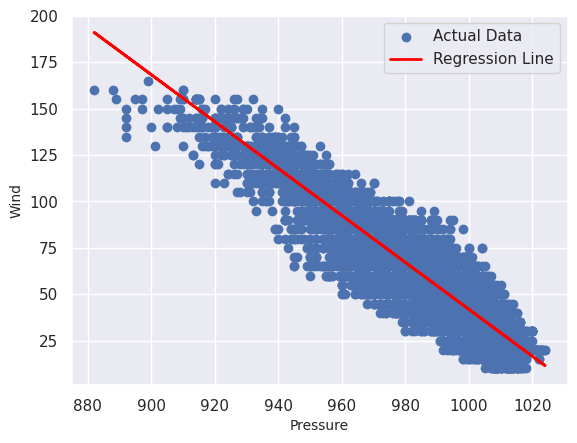

In [157]:
plt.scatter(X1, y, label="Actual Data")

# Get predicted values from the model
yhat = results.predict(X)

# Plot the regression line
plt.plot(X1, yhat, lw=2, c='red', label='Regression Line')

# Labels and title
plt.xlabel('Pressure', fontsize=10)
plt.ylabel('Wind', fontsize=10)
plt.legend()
plt.show()

In [467]:
x=1000
yhat=1057.8136	 + -1.0038*x
yhat
print(f"Predicted Wind Speed for pressure of {x} Pa: {yhat:.2f}")

Predicted Wind Speed for pressure of 1000 Pa: 54.01


# 5. Bayesian Linear Regression

In [443]:
import pymc as pm
import arviz as az
import xarray as xr

In [444]:
y=df['wind']

Output()

Output()

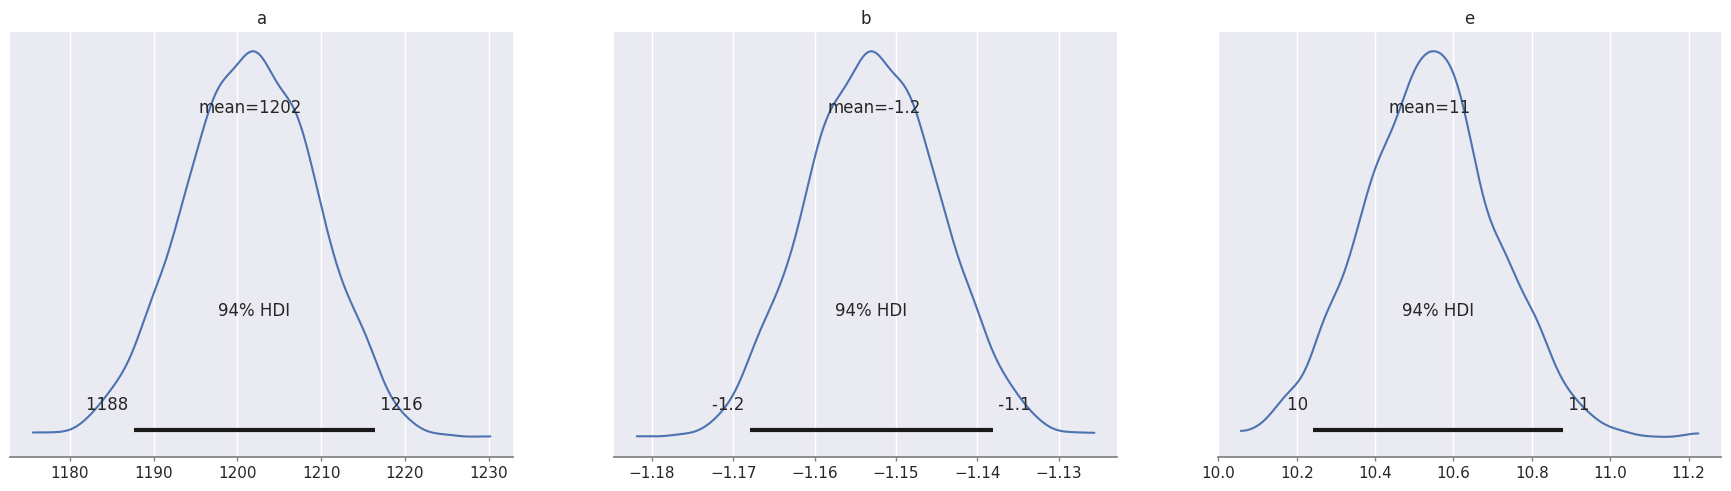

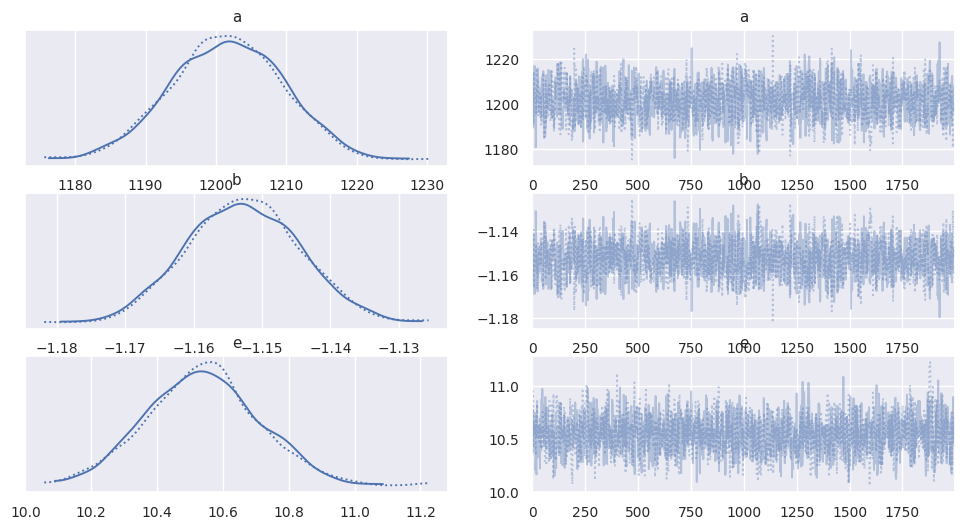

In [472]:
with pm.Model() as bayesian_linear_model:
    # Priors based on OLS estimates
    a = pm.Normal("a", mu=1306.4580, sigma=10)  # Intercept prior
    b = pm.Normal("b", mu=-1.2646, sigma=10)
    e = pm.HalfCauchy("e", beta=10)  # Half-Cauchy prior for error term

    # Likelihood
    wind = pm.Normal("wind", mu=a + b * df['pressure'], sigma=e, observed=y)

with bayesian_linear_model:
  trace = pm.sample(2000, tune=2000)






# # Summarizing the trace
az.plot_posterior(trace.posterior)
az.plot_trace(trace);




In [473]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1201.559,7.822,1187.657,1216.438,0.219,0.155,1277.0,1376.0,1.0
b,-1.153,0.008,-1.168,-1.138,0.000,0.000,1276.0,1358.0,1.0
e,10.540,0.170,10.242,10.878,0.005,0.003,1447.0,1291.0,1.0


In [474]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [475]:
a_samples = trace.posterior["a"].values
b_samples = trace.posterior["b"].values
e_samples = trace.posterior["e"].values

# Computing the mean and standard deviation for each parameter
a_mean = np.mean(a_samples)
a_std = np.std(a_samples)

b_mean = np.mean(b_samples)
b_std = np.std(b_samples)

e_mean = np.mean(e_samples)
e_std = np.std(e_samples)

print(f"Intercept (a) - Mean: {a_mean:.4f}, Standard Deviation: {a_std:.4f}")
print(f"Slope (b) - Mean: {b_mean:.4f}, Standard Deviation: {b_std:.4f}")
print(f"Error (e) - Mean: {e_mean:.4f}, Standard Deviation: {e_std:.4f}")

Intercept (a) - Mean: 1201.5594, Standard Deviation: 7.8212
Slope (b) - Mean: -1.1527, Standard Deviation: 0.0081
Error (e) - Mean: 10.5398, Standard Deviation: 0.1703


In [476]:
new_pres = 1000

point_prediction = a_mean + b_mean * new_pres

print(f"Point prediction for wind at pressure = {new_pres} pa: {point_prediction:.4f}")


Point prediction for wind at pressure = 1000 pa: 48.8652


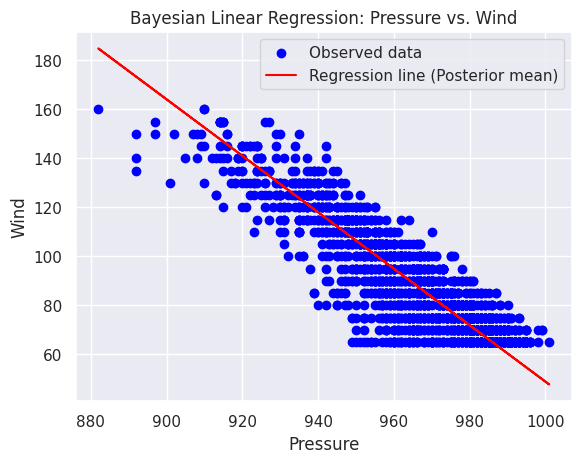

In [481]:
# Getting the predicted values using the posterior mean of the intercept and slope
y_pred = a_mean + b_mean * df['pressure']

plt.scatter(df['pressure'], y, color='blue', label='Observed data')

plt.plot(df['pressure'], y_pred, color='red', label='Regression line (Posterior mean)')


plt.xlabel('Pressure')
plt.ylabel('Wind')
plt.title('Bayesian Linear Regression: Pressure vs. Wind')
plt.legend()

plt.show()

In [479]:

# Extracting the observed values (y) and pressure values (X) from the data
y_obs = y
X = df['pressure'].values  # pressure values

a_mean = np.mean(trace.posterior["a"].values)
b_mean = np.mean(trace.posterior["b"].values)

y_pred = a_mean + b_mean * X

RSS = np.sum((y_obs - y_pred) ** 2)

# Calculate total sum of squares (TSS)
TSS = np.sum((y_obs - np.mean(y_obs)) ** 2)

# Calculating R-squared
r_squared = 1 - (RSS / TSS)

print(f"R-squared: {r_squared:.4f}")


R-squared: 0.7662


In [480]:
y_pred = a_mean + b_mean * X

absolute_percentage_error = np.abs((y_obs - y_pred) / y_obs) * 100

mape = np.mean(absolute_percentage_error)

print(f"Mean Absolute Percentage Error: {mape:.4f}%")


Mean Absolute Percentage Error: 9.4067%


# 6. References

[PyMc - Bayesian Linear Regression](https://optimumsportsperformance.com/blog/bayesian-linear-regression-getting-started-with-pymc3/)

[GLM: Linear regression](https://www.pymc.io/projects/docs/en/latest/learn/core_notebooks/GLM_linear.html)


[Dataset ](https://www.kaggle.com/datasets/utkarshx27/noaa-atlantic-hurricane-database)

[NHC Noaa](https://www.nhc.noaa.gov/data/#hurdat)